In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

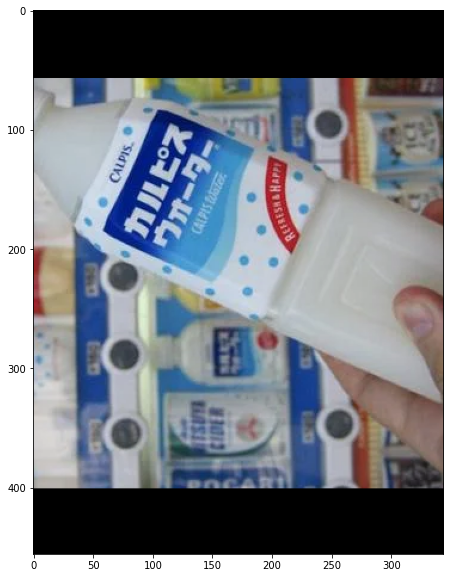

In [25]:
img_1 = cv2.imread('/content/drive/MyDrive/image_crop.png')
image_center = tuple(np.array(img_1.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, 90, 1.0)
img_1 = cv2.warpAffine(img_1, rot_mat, img_1.shape[1::-1], flags=cv2.INTER_LINEAR) 

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

In [26]:
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

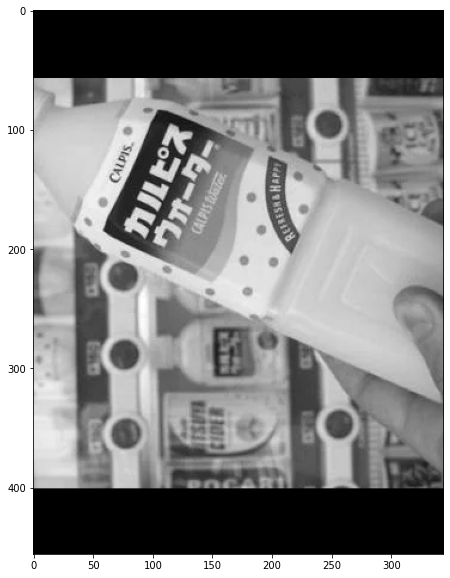

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(img_1, cmap='gray')

In [28]:
orb = cv2.ORB_create()
kp_1, des_1 = orb.detectAndCompute(img_1, None)
img_1_key_points = cv2.drawKeypoints(img_1, kp_1, des_1)

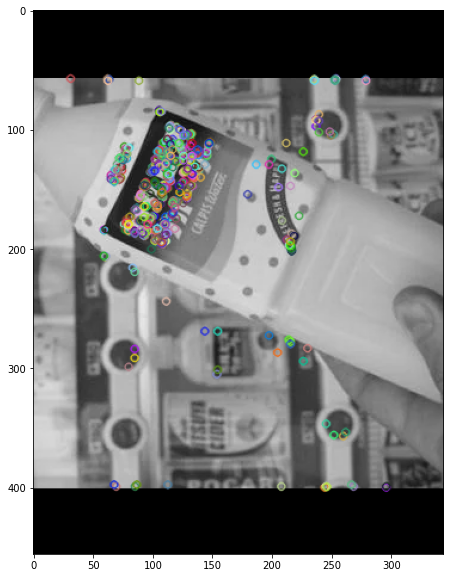

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(img_1_key_points)

In [10]:
des_1

array([[121,  77,  69, ..., 244, 120,  92],
       [118, 251,  18, ...,  15,  63,  79],
       [181,  68, 109, ..., 254, 122,  86],
       ...,
       [223, 217, 226, ..., 181, 248,  84],
       [155,  78, 239, ..., 245,  48, 249],
       [ 60, 255,  45, ..., 123,   4, 115]], dtype=uint8)

In [ ]:
kp_1

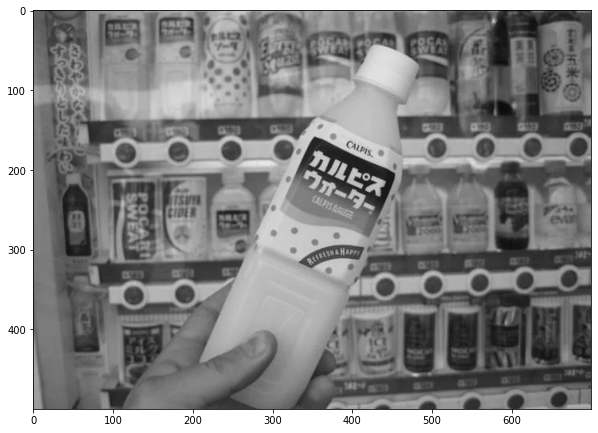

In [30]:
scene = cv2.imread('/content/drive/MyDrive/image.png', cv2.IMREAD_GRAYSCALE) 

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(scene, cv2.COLOR_BGR2RGB))

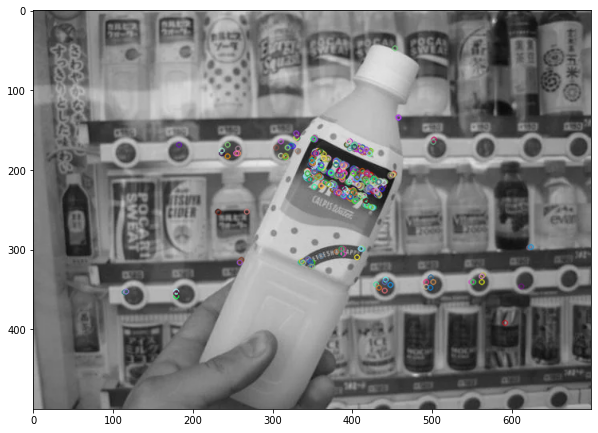

In [31]:
orb = cv2.ORB_create()
kp_2, des_2 = orb.detectAndCompute(scene, None)
scene_key_points = cv2.drawKeypoints(scene, kp_2, des_2)

plt.figure(figsize=(10,10))
plt.imshow(scene_key_points)

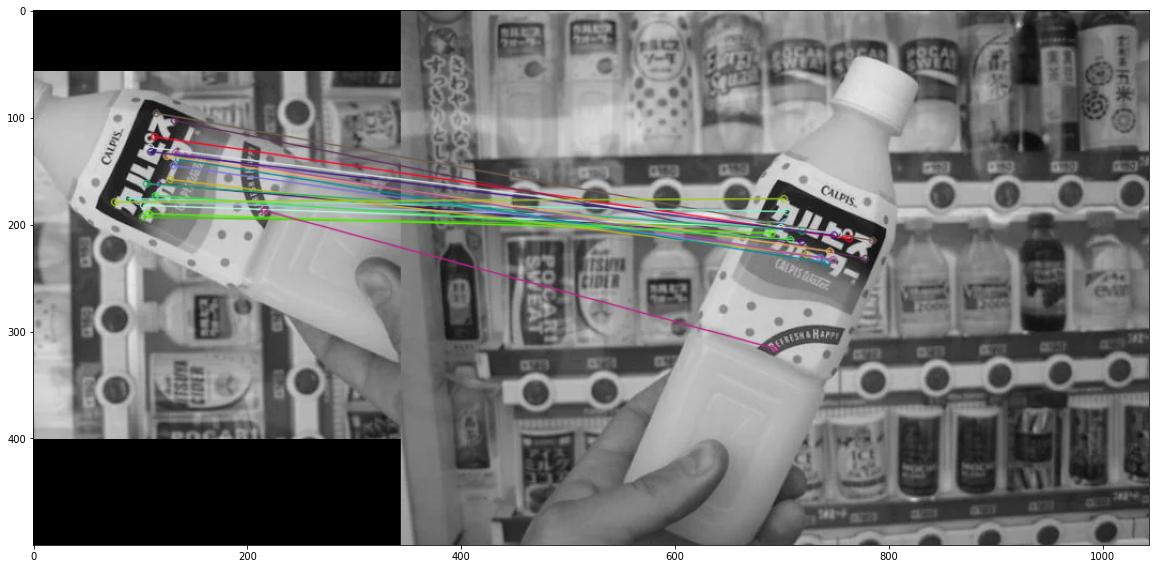

In [32]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors. 
matches = bf.match(des_1, des_2) 

# Sort them in the order of their distance. 
matches = sorted(matches, key = lambda x:x.distance) 

# Draw first 10 matches. 
res = cv2.drawMatches(img_1, kp_1,
                      scene, kp_2,
                      matches[:20], None,
                      flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 

plt.figure(figsize=(20,20))
plt.imshow(res) 
plt.show()

In [33]:
from scipy.spatial.distance import hamming

In [34]:
hamming(des_1[0], des_2[0]) * len(des_1[0])
def hamming_dist(arr_1, arr_2):
  distance = np.sum(arr_1 != arr_2)
  return distance

In [35]:
matches_own = []
for i, k_1 in enumerate(des_1):
  min_distance = np.inf
  train_idx = 0

  for j, k_2 in enumerate(des_2):
    distance = hamming_dist(k_1, k_2)

    if min_distance > distance:
      min_distance = distance
      train_idx = j
    
  matches_own.append(cv2.DMatch(_distance=min_distance,
                                _imgIdx=0, _queryIdx=i, _trainIdx=train_idx))

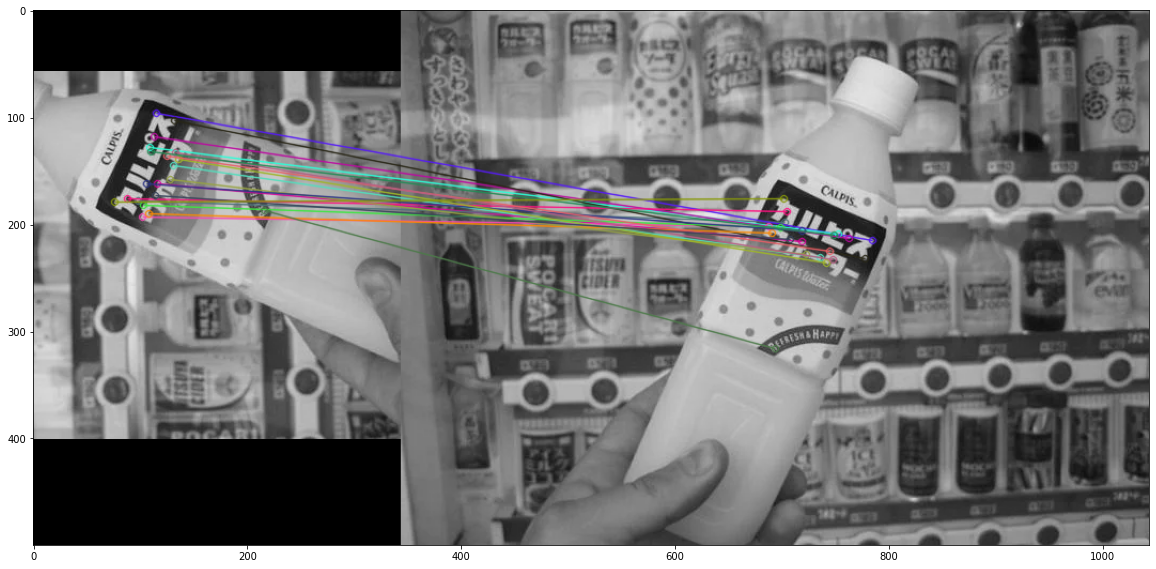

In [36]:
matches_own = sorted(matches_own, key = lambda x:x.distance) 

res_own = cv2.drawMatches(img_1, kp_1,
                          scene, kp_2,
                          matches_own[:20], None,
                          flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 

plt.figure(figsize=(20,20))
plt.imshow(res_own)
plt.show()